## Script for automated analysis of trajectories from flies in fly bowl during CsChrimson stimulation
###Project: Flp-out based CsChrimson activation of putative CX-output neurons in walking flies

In [2]:
from scipy.io import loadmat
import csv
import numpy as np
from scipy import sparse as sps

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
import matplotlib.colors as colors

import os
import sys
from glob import glob
from os.path import isfile, sep

import seaborn as sns

sys.path.insert(0, '/Users/haberkernh/Documents//code/flyBowl/')
from flyBowlChrAssay_plottingFunctions import plotSparseMatrix, plotPosInRange, plotVeloHistogram,\
    veloPerTrial, veloPerTrialAverage, plotPosAndAngleInRange_singleFly_colorStim,\
    plotPosAndAngleInRange_singleFly_colorTrial, plotPosAndAngleInRange_singleFly_separateTrials,\
    plotPosAndAngleInRange_singleFly_separateTrials2,plotPosAndAngleInRange_singleFly_separateTrials3

%matplotlib inline

# Note: Additional functions are defined at the end of this script. 
# Corresponding cells need to be evaluated before running the ananlysis for the first time

In [3]:
#rootDir = '/Volumes/jayaraman/Chuntao/Ming_FlyBowl/'#'/Users/hannah/Desktop/flyBowlTestData/SS02232/'
#analysisDir = '/Volumes/jayaraman/Hannah/Analysis_Ming_FlyBowl/'# rootDir +'analysis' + sep
#dateDirs = os.walk(rootDir).next()[1]
#dateDir = dateDirs[0]
#expList =  os.walk(rootDir+dateDir).next()[1] # + 'rawData' + sep

In [10]:
# Single genotype analysis
rootDir = '/Volumes/jayaramanlab/Chuntao/Ming_FlyBowl/Lori_CsChrimson_Screen/'
analysisDir = '/Volumes/jayaramanlab/from_tier2/Hannah/Analysis_FlyBowl_forSymposium/'
lineName = '16D01'

expList = [filepath.split(sep)[-1] for filepath in glob(rootDir + '*'+lineName+'*')]
sorted(expList)

['16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T123443',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T124824',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151111T154524',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101341',
 '16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101658',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151105T123953',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151105T125246',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151111T154951',
 '16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151112T102422',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T143706',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T144702',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151118T122757',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151118T123804',
 '16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151119T1

In [11]:
fps = 30 # Video sampling rate

for currDir in range(len(expList)):
    folder = expList[currDir]
    print(folder)

    #singleExperimentAnalysis(expList[currDir])
    singleExperimentReducedAnalysis(expList[currDir])

16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T123204

 Analysing the following log files in 16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T123204:

['ctrax_results.mat', 'indicatordata.mat', 'jaabadetect_info.mat', 'perframefeatures_info.mat', 'protocol.mat', 'registered_trx.mat', 'registrationdata.mat', 'scores_backup_rai.mat', 'sexclassifier.mat', 'wingtracking_results.mat']
16D01_B
flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T123204
Genotype folder already exists
Protocol folder already exists
Experiment folder already exists


TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
import pandas as pd
keylist = ['genotype','protocol','trial','block','vT','vR','TI']
BoxPlotAllFlies_df = pd.DataFrame(data=np.zeros((0,len(keylist))), columns=keylist)

for currDir in range(len(expList)):
    folder = expList[currDir]
    print(folder)
    
    fileNameParts = folder.split('_')
    genotype = '_'.join(fileNameParts[0:fileNameParts.index('flyBowlMing')])
    protocolName = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):-1])
    experiment = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):])
    timestamp = fileNameParts[-1]
    
    boxPlotMyLine = np.load(analysisDir + genotype + sep + protocolName + sep + timestamp + sep + folder + '_boxPlot.npy')
    boxPlotMyLine = boxPlotMyLine.item()
    #plt.boxplot(perFlyAvVR,labels=blockNames);
    
    bpdf = pd.DataFrame.from_dict(boxPlotMyLine, orient='columns')
    bpdf.insert(0, 'genotype', genotype)
    bpdf.insert(1, 'protocol', protocolName)
    bpdf.insert(2, 'trial', timestamp)
    
    BoxPlotAllFlies_df = BoxPlotAllFlies_df.append(bpdf)

BoxPlotAllFlies_df = BoxPlotAllFlies_df[keylist]

BoxPlotAllFlies_df['genotype'] = BoxPlotAllFlies_df['genotype'].astype('category')
BoxPlotAllFlies_df['protocol'] = BoxPlotAllFlies_df['protocol'].astype('category')
BoxPlotAllFlies_df['trial'] = BoxPlotAllFlies_df['trial'].astype('category')
BoxPlotAllFlies_df['block'] = BoxPlotAllFlies_df['block'].astype('category')

BoxPlotAllFlies_df 

16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T123204
16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151117T144702
16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151117T144118
16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151119T100912
16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101658
16D01_B_flyBowlMing_protocol_Chuntao_15intensity_1s_20151120T092237
16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151111T154951
16D01_A_flyBowlMing_protocol_Chuntao_30intensity_1s_20151112T102422
16D01_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151118T124209
16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T124824
16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101341


IOError: [Errno 2] No such file or directory: '/Volumes/jayaramanlab/from_tier2/Hannah/Analysis_FlyBowl_forSymposium/16D01_A/flyBowlMing_protocol_Chuntao_15intensity_1s/20151112T101341/16D01_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151112T101341_boxPlot.npy'

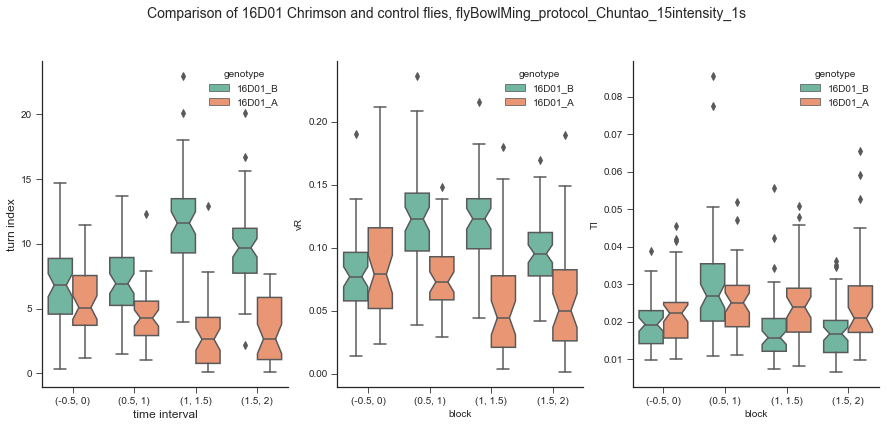

In [13]:
currentProtocol = 'flyBowlMing_protocol_Chuntao_15intensity_1s'

BoxPlotRed_df = BoxPlotAllFlies_df.query('(protocol=="'+currentProtocol+'")')
notchFlag = True
boxPlotFig = plt.figure(figsize=(15,6))
sns.set_style('ticks')
ax1 = boxPlotFig.add_subplot(131)
ax1 = sns.boxplot(x='block', y='vT', hue='genotype', data=BoxPlotRed_df,palette='Set2',notch=notchFlag)
#ax1 = sns.swarmplot(x="block", y="vT", hue="genotype", data=BoxPlotRed_df, color=".5")  #may require seaborn update
ax1.set_ylabel('translational velocity (mm/s)',fontsize=12)
ax1.set_xlabel('time interval',fontsize=12)
sns.despine()
ax2 = boxPlotFig.add_subplot(132)
ax2 = sns.boxplot(x='block', y='vR', hue='genotype', data=BoxPlotRed_df,palette='Set2',notch=notchFlag)
ax1.set_ylabel('abs. rotational velocity (deg/s)',fontsize=12)
ax1.set_xlabel('time interval',fontsize=12)
sns.despine()
ax3 = boxPlotFig.add_subplot(133)
ax3 = sns.boxplot(x='block', y='TI', hue='genotype', data=BoxPlotRed_df,palette='Set2',notch=notchFlag)
ax1.set_ylabel('turn index',fontsize=12)
ax1.set_xlabel('time interval',fontsize=12)
sns.despine()
ttl = boxPlotFig.suptitle('Comparison of '+genotype[:-2] + ' Chrimson and control flies, ' + protocolName, y=1.005,fontsize=14)
boxPlotFig.savefig(analysisDir + genotype[:-2] + '_' + currentProtocol + '_boxplotComparison.pdf', format = 'pdf',
                   bbox_extra_artists=(ttl,), bbox_inches='tight')

In [28]:
# Single genotype analysis
rootDir = '/Volumes/jayaraman/Chuntao/Ming_FlyBowl/Lori_CsChrimson_Screen/'
analysisDir = '/Volumes/jayaraman/Hannah/Analysis_FlyBowl_forSymposium/'
lineName = 'SS02242_A_flyBowlMing_protocol_Chuntao_15intensity'

expList = [filepath.split(sep)[-1] for filepath in glob(rootDir + sep + '*'+lineName+'*')]
sorted(expList)

['SS02242_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T111657',
 'SS02242_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T112850',
 'SS02242_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151106T144528',
 'SS02242_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151111T093925']

SS02242_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T112850
SS02242_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151106T144528
SS02242_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151111T093925
SS02242_A_flyBowlMing_protocol_Chuntao_15intensity_1s_20151105T111657


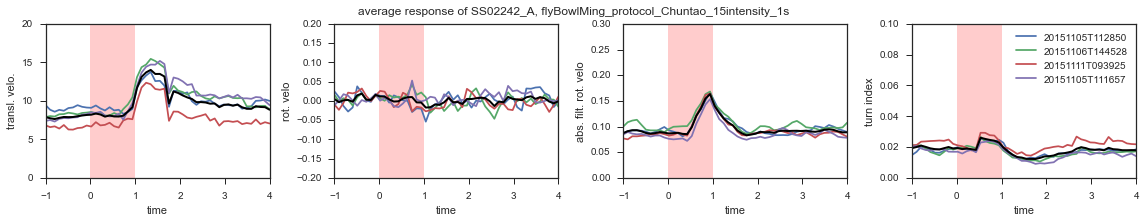

In [29]:
sns.set_style('ticks')
legendText = []
#cNorm  = colors.Normalize(vmin=0, vmax=len(expList))
#timeCMap = plt.cm.ScalarMappable(norm=cNorm,cmap='Spectral')

expCompFig = plt.figure(figsize=((16,3)))
expCompPlt1 = expCompFig.add_subplot(141)
expCompPlt2 = expCompFig.add_subplot(142)
expCompPlt3 = expCompFig.add_subplot(143)
expCompPlt4 = expCompFig.add_subplot(144)

allMeanTransV = []
allMeanRotV = []
allMeanAbsRotV_filt = []
allMeanAbsTurnInd = []

for currDir in range(len(expList)):
    folder = expList[currDir]
    print(folder)
    
    fileNameParts = folder.split('_')
    genotype = '_'.join(fileNameParts[0:fileNameParts.index('flyBowlMing')])
    protocolName = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):-1])
    experiment = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):])
    timestamp = fileNameParts[-1]

    meanRespMyLine = np.load(analysisDir + genotype + sep + protocolName + sep + timestamp + sep + folder + '_meanResponses.npy')
    meanRespMyLine = meanRespMyLine.item()
    
    expCompPlt1.plot(meanRespMyLine['time'],meanRespMyLine['meanTransV'])
    expCompPlt2.plot(meanRespMyLine['time'],meanRespMyLine['meanRotV'])
    expCompPlt3.plot(meanRespMyLine['time'],meanRespMyLine['meanAbsRotV_filt'])
    expCompPlt4.plot(meanRespMyLine['time'],meanRespMyLine['meanAbsTurnInd'])
    
    legendText.append(folder.split('_')[-1])
    
    allMeanTransV.append(meanRespMyLine['meanTransV'])
    allMeanRotV.append(meanRespMyLine['meanRotV'])
    allMeanAbsRotV_filt.append(meanRespMyLine['meanAbsRotV_filt'])
    allMeanAbsTurnInd.append(meanRespMyLine['meanAbsTurnInd'])

expCompPlt1.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanTransV),0),'k',linewidth = 2)
expCompPlt2.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanRotV),0),'k',linewidth = 2)
expCompPlt3.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanAbsRotV_filt),0),'k',linewidth = 2)
expCompPlt4.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanAbsTurnInd),0),'k',linewidth = 2)


def formatSubplots(sph, xlab, ylab,ylim):
    sph.set_xlabel(xlab)
    sph.set_ylabel(ylab)
    sph.set_ylim(ylim)
    sph.yaxis.set_ticks_position('left')
    sph.xaxis.set_ticks_position('bottom')
    sph.add_patch(patches.Rectangle((0,-1), 1, 30, alpha = 0.2, facecolor = 'red', edgecolor = 'none'))

formatSubplots(expCompPlt1, 'time', 'transl. velo.',(0,20))
formatSubplots(expCompPlt2, 'time', 'rot. velo',(-0.2,0.2))
formatSubplots(expCompPlt3, 'time', 'abs. filt. rot. velo',(0, 0.3))
formatSubplots(expCompPlt4, 'time', 'turn index',(0, 0.1))

expCompPlt4.legend(legendText)

expCompFig.tight_layout()
ttl = expCompFig.suptitle('average response of '+genotype + ', ' + protocolName, y=1.01,fontsize=12)
expCompFig.savefig(analysisDir + genotype + sep + protocolName + sep + genotype + '_' + protocolName + '_summary.pdf', format = 'pdf',
                   bbox_extra_artists=(ttl,), bbox_inches='tight')

SS02242_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151111T153631
SS02242_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151112T100346
SS02242_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151112T135726
SS02242_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151110T113233


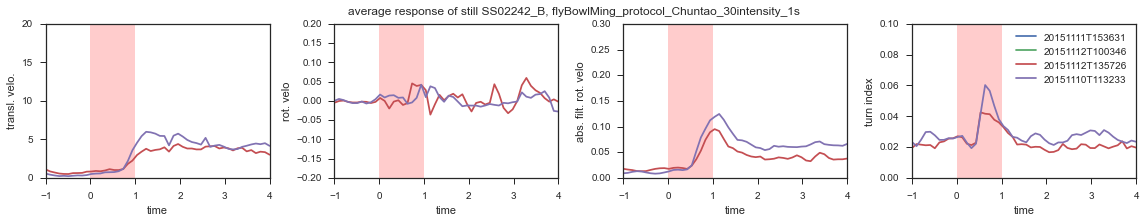

In [24]:
sns.set_style('ticks')
legendText = []
#cNorm  = colors.Normalize(vmin=0, vmax=len(expList))
#timeCMap = plt.cm.ScalarMappable(norm=cNorm,cmap='Spectral')

expCompFig = plt.figure(figsize=((16,3)))
expCompPlt1 = expCompFig.add_subplot(141)
expCompPlt2 = expCompFig.add_subplot(142)
expCompPlt3 = expCompFig.add_subplot(143)
expCompPlt4 = expCompFig.add_subplot(144)

allMeanTransV = []
allMeanRotV = []
allMeanAbsRotV_filt = []
allMeanAbsTurnInd = []

for currDir in range(len(expList)):
    folder = expList[currDir]
    print(folder)
    
    fileNameParts = folder.split('_')
    genotype = '_'.join(fileNameParts[0:fileNameParts.index('flyBowlMing')])
    protocolName = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):-1])
    experiment = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):])
    timestamp = fileNameParts[-1]

    meanRespMyLine = np.load(analysisDir + genotype + sep + protocolName + sep + timestamp + sep + folder + '_meanResponses_still.npy')
    meanRespMyLine = meanRespMyLine.item()
    
    expCompPlt1.plot(meanRespMyLine['time'],meanRespMyLine['meanTransV'])
    expCompPlt2.plot(meanRespMyLine['time'],meanRespMyLine['meanRotV'])
    expCompPlt3.plot(meanRespMyLine['time'],meanRespMyLine['meanAbsRotV_filt'])
    expCompPlt4.plot(meanRespMyLine['time'],meanRespMyLine['meanAbsTurnInd'])
    
    legendText.append(folder.split('_')[-1])
    
    allMeanTransV.append(meanRespMyLine['meanTransV'])
    allMeanRotV.append(meanRespMyLine['meanRotV'])
    allMeanAbsRotV_filt.append(meanRespMyLine['meanAbsRotV_filt'])
    allMeanAbsTurnInd.append(meanRespMyLine['meanAbsTurnInd'])

expCompPlt1.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanTransV),0),'k',linewidth = 2)
expCompPlt2.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanRotV),0),'k',linewidth = 2)
expCompPlt3.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanAbsRotV_filt),0),'k',linewidth = 2)
expCompPlt4.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanAbsTurnInd),0),'k',linewidth = 2)


def formatSubplots(sph, xlab, ylab,ylim):
    sph.set_xlabel(xlab)
    sph.set_ylabel(ylab)
    sph.set_ylim(ylim)
    sph.yaxis.set_ticks_position('left')
    sph.xaxis.set_ticks_position('bottom')
    sph.add_patch(patches.Rectangle((0,-1), 1, 30, alpha = 0.2, facecolor = 'red', edgecolor = 'none'))

formatSubplots(expCompPlt1, 'time', 'transl. velo.',(0,20))
formatSubplots(expCompPlt2, 'time', 'rot. velo',(-0.2,0.2))
formatSubplots(expCompPlt3, 'time', 'abs. filt. rot. velo',(0, 0.3))
formatSubplots(expCompPlt4, 'time', 'turn index',(0, 0.1))

expCompPlt4.legend(legendText)

expCompFig.tight_layout()
ttl = expCompFig.suptitle('average response of still '+genotype + ', ' + protocolName, y=1.01,fontsize=12)
expCompFig.savefig(analysisDir + genotype + sep + protocolName + sep + genotype + '_' + protocolName + '_summary_still.pdf', format = 'pdf',
                   bbox_extra_artists=(ttl,), bbox_inches='tight')

SS02242_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151111T153631
SS02242_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151112T100346
SS02242_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151112T135726
SS02242_B_flyBowlMing_protocol_Chuntao_30intensity_1s_20151110T113233


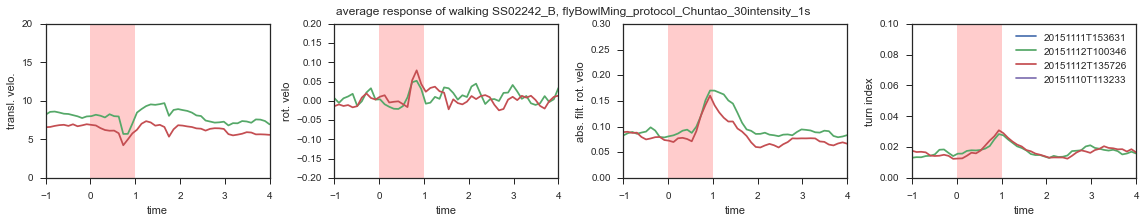

In [25]:
sns.set_style('ticks')
legendText = []
#cNorm  = colors.Normalize(vmin=0, vmax=len(expList))
#timeCMap = plt.cm.ScalarMappable(norm=cNorm,cmap='Spectral')

expCompFig = plt.figure(figsize=((16,3)))
expCompPlt1 = expCompFig.add_subplot(141)
expCompPlt2 = expCompFig.add_subplot(142)
expCompPlt3 = expCompFig.add_subplot(143)
expCompPlt4 = expCompFig.add_subplot(144)

allMeanTransV = []
allMeanRotV = []
allMeanAbsRotV_filt = []
allMeanAbsTurnInd = []

for currDir in range(len(expList)):
    folder = expList[currDir]
    print(folder)
    
    fileNameParts = folder.split('_')
    genotype = '_'.join(fileNameParts[0:fileNameParts.index('flyBowlMing')])
    protocolName = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):-1])
    experiment = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):])
    timestamp = fileNameParts[-1]

    meanRespMyLine = np.load(analysisDir + genotype + sep + protocolName + sep + timestamp + sep + folder + '_meanResponses_walk.npy')
    meanRespMyLine = meanRespMyLine.item()
    
    expCompPlt1.plot(meanRespMyLine['time'],meanRespMyLine['meanTransV'])
    expCompPlt2.plot(meanRespMyLine['time'],meanRespMyLine['meanRotV'])
    expCompPlt3.plot(meanRespMyLine['time'],meanRespMyLine['meanAbsRotV_filt'])
    expCompPlt4.plot(meanRespMyLine['time'],meanRespMyLine['meanAbsTurnInd'])
    
    legendText.append(folder.split('_')[-1])
    
    allMeanTransV.append(meanRespMyLine['meanTransV'])
    allMeanRotV.append(meanRespMyLine['meanRotV'])
    allMeanAbsRotV_filt.append(meanRespMyLine['meanAbsRotV_filt'])
    allMeanAbsTurnInd.append(meanRespMyLine['meanAbsTurnInd'])

expCompPlt1.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanTransV),0),'k',linewidth = 2)
expCompPlt2.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanRotV),0),'k',linewidth = 2)
expCompPlt3.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanAbsRotV_filt),0),'k',linewidth = 2)
expCompPlt4.plot(meanRespMyLine['time'],np.mean(np.asarray(allMeanAbsTurnInd),0),'k',linewidth = 2)


def formatSubplots(sph, xlab, ylab,ylim):
    sph.set_xlabel(xlab)
    sph.set_ylabel(ylab)
    sph.set_ylim(ylim)
    sph.yaxis.set_ticks_position('left')
    sph.xaxis.set_ticks_position('bottom')
    sph.add_patch(patches.Rectangle((0,-1), 1, 30, alpha = 0.2, facecolor = 'red', edgecolor = 'none'))

formatSubplots(expCompPlt1, 'time', 'transl. velo.',(0,20))
formatSubplots(expCompPlt2, 'time', 'rot. velo',(-0.2,0.2))
formatSubplots(expCompPlt3, 'time', 'abs. filt. rot. velo',(0, 0.3))
formatSubplots(expCompPlt4, 'time', 'turn index',(0, 0.1))

expCompPlt4.legend(legendText)

expCompFig.tight_layout()
ttl = expCompFig.suptitle('average response of walking '+genotype + ', ' + protocolName, y=1.01,fontsize=12)
expCompFig.savefig(analysisDir + genotype + sep + protocolName + sep + genotype + '_' + protocolName + '_summary_walk.pdf', format = 'pdf',
                   bbox_extra_artists=(ttl,), bbox_inches='tight')

In [7]:
def singleExperimentReducedAnalysis(folder):
    
    #matFlyBowl = [filepath.split(sep)[-1] for filepath in glob(rootDir + dateDir + sep + folder + sep + '*.mat')]
    matFlyBowl = [filepath.split(sep)[-1] for filepath in glob(rootDir + sep + folder + sep + '*.mat')]
    matFlyBowl = sorted(matFlyBowl)

    print('\n Analysing the following log files in '+expList[currDir]+':\n')
    print(matFlyBowl)

    fileNameParts = folder.split('_')

    genotype = '_'.join(fileNameParts[0:fileNameParts.index('flyBowlMing')])
    protocolName = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):-1])
    experiment = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):])
    timestamp = fileNameParts[-1]

    print(genotype)
    print(experiment)

    plotSaveDir = analysisDir + genotype + sep + protocolName + sep + timestamp

    try:
        os.mkdir(analysisDir + genotype )
    except OSError:
        print('Genotype folder already exists')

    try:
        os.mkdir(analysisDir + genotype + sep + protocolName)
    except OSError:
        print('Protocol folder already exists')

    try:
        os.mkdir(plotSaveDir)
    except OSError:
        print('Experiment folder already exists')


    # Import and rearrange data ...........................................................................................
    fileName = 'ctrax_results'

    # Extract relevant tracking parameter
    keyList = ['timestamps','x_pos','y_pos','ntargets','identity','angle'] #data columns to be extracted from ctrax file

    #load matlab data and convert
    #indat = loadmat(rootDir + dateDir + sep + folder + sep + fileName + '.mat')
    indat = loadmat(rootDir + folder + sep + fileName + '.mat')

    dat = [indat[k] for k in keyList]

    # Reorganise fly position arrays into lists (sorted by frame)
    numFrames = len(dat[0])
    xPos = []
    yPos = []
    angle = []
    flyID = []

    pointer = 0
    for t in range(numFrames):
        numFlies = dat[3][t].astype('int')[0]

        xPos.append(dat[1][pointer:pointer+numFlies])
        yPos.append(dat[2][pointer:pointer+numFlies])
        angle.append(dat[5][pointer:pointer+numFlies])
        flyID.append(dat[4][pointer:pointer+numFlies])

        pointer += numFlies

    xPos = np.array(xPos)
    yPos = np.array(yPos)
    angle = np.array(angle)
    flyID = np.array(flyID)
    maxFlyID = max(dat[4])

    # Reorganise fly track fragments into matrix (frame x fly id )
    flyIDperFrame = np.zeros((numFrames,maxFlyID+1))
    for frame in range(numFrames):
        for idx in np.array(flyID[frame]).squeeze().astype('int'):
            flyIDperFrame[frame][idx] = 1


    # Extract protocol parameter ......................................................................................
    #protocol = loadmat(rootDir + dateDir + sep + folder + sep + 'protocol.mat') #load protocol parameter
    protocol = loadmat(rootDir + folder + sep + 'protocol.mat') #load protocol parameter
    protocol = protocol['protocol'] #extract values from dict

    intensity = protocol['intensity'].squeeze().astype('int')
    pulseWidth = protocol['pulseWidthSP'].squeeze().astype('int')
    pulsePeriod = protocol['pulsePeriodSP'].squeeze().astype('int')
    stimTms = pulseWidth
    pauseTms = protocol['offTime'].squeeze().astype('int')
    numRepeat = protocol['iteration'].squeeze().astype('int')
    delayStart = protocol['delayTime'].squeeze().astype('int')

    stimCycle = (stimTms+pauseTms)/1000

    # total length of protocol
    experimentT = (delayStart + numRepeat*stimCycle*fps)

    skipFrame = 3 #downsample from 30Hz --> 10Hz

    #Build indicator vector for red light stimulation
    stimBlock = np.hstack((np.ones((stimTms/1000)*fps),np.zeros((pauseTms/1000) * fps)))
    stimCode = np.tile(stimBlock,numRepeat)

    trialBlock = np.ones(((stimTms+pauseTms)/1000)*fps)
    trialCode = np.repeat(range(1,numRepeat+1),((stimTms+pauseTms)/1000)*fps)

    trialBegin = [(k*(stimTms+pauseTms)/1000.0)*fps/skipFrame for k in range(numRepeat)]
    trialBlockPts = ((stimTms+pauseTms)/1000.0)*fps/skipFrame
    trialBlockT = np.linspace(0,(stimTms+pauseTms)/1000.0,trialBlockPts)


    # Compute translational and rotational velocity over entire experiment ............................................
    frameRange = range((delayStart)*fps,(delayStart + numRepeat*((stimTms+pauseTms)/1000)) * fps,skipFrame)
    activeFragments = np.array(np.nonzero(sum(flyIDperFrame[frameRange]))).squeeze()

    transV = np.zeros((len(frameRange),len(activeFragments)))
    transV_filt = np.zeros((len(frameRange),len(activeFragments)))
    rotV = np.zeros((len(frameRange),len(activeFragments)))
    rotV_filt = np.zeros((len(frameRange),len(activeFragments)))

    for k, fly in enumerate(activeFragments):

        currTransV = np.zeros((len(frameRange),1))
        currRotV = np.zeros((len(frameRange),1))

        for ind,frame in enumerate(frameRange):
            if((not np.any(flyID[frame] == fly)) or (not np.any(flyID[frame-skipFrame] == fly))):
                continue;

            currTransV[ind] = np.hypot(xPos[frame][flyID[frame] == fly] - xPos[frame-skipFrame][flyID[frame-skipFrame] == fly],
                                      yPos[frame][flyID[frame] == fly] - yPos[frame-skipFrame][flyID[frame-skipFrame] == fly])

            currRotV[ind] = angle[frame][flyID[frame] == fly] - angle[frame-skipFrame][flyID[frame-skipFrame] == fly]
            if(currRotV[ind]>np.pi): currRotV[ind] = currRotV[ind]-2*np.pi
            if(currRotV[ind]<-np.pi): currRotV[ind] = currRotV[ind]+2*np.pi

        transV[:,k] = currTransV.squeeze()
        transV_filt[:,k] = np.convolve(currTransV.squeeze(), np.ones((5,))/5, mode='same')
        rotV[:,k] = currRotV.squeeze()
        rotV_filt[:,k] = np.convolve(currRotV.squeeze(), np.ones((5,))/5, mode='same')


    # (3) Visualise responses triggered on light ON

    windowPreMS = 1000
    windowPostMS = 3000
    stimDurationS = stimTms/1000
    #Note: to be able to look at pre-stimulus window, the first trial is not regarded
    trialBegin = [((k+1)*(stimTms+pauseTms)/1000.0)*fps/skipFrame for k in range(numRepeat-1)]
    trialWindowBlockPts = ((stimTms+windowPreMS+windowPostMS)/1000.0)*fps/skipFrame
    trialWindowBlockT = np.linspace(-windowPreMS/1000.0,(stimTms+windowPostMS)/1000.0,trialWindowBlockPts)
    plotBegin = [trialBegin[i]-windowPreMS/1000.0*fps/skipFrame for i in range(len(trialBegin))]


    #compute average responses (average over trials and flies)
    turnInd = rotV_filt/transV_filt
    meanTransV = np.mean([np.nanmean(transV[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanTransV_filt = np.mean([np.nanmean(transV_filt[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanTurnInd = np.mean([np.nanmean(turnInd[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanAbsTurnInd = np.mean([np.nanmean(abs(turnInd[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :]), 1) for i in range(len(plotBegin))],0)
    meanRotV = np.mean([np.nanmean(rotV[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanRotV_filt = np.mean([np.nanmean(rotV_filt[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanAbsRotV_filt = np.mean([np.nanmean(abs(rotV_filt[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :]), 1) for i in range(len(plotBegin))],0)

    #collect mean responses for later line/experiment comparison
    meanRespPerLine = {
        'time': trialWindowBlockT,
        'meanTransV': meanTransV,
        'meanTransV_filt': meanTransV_filt,
        'meanTurnInd': meanTurnInd,
        'meanAbsTurnInd': meanAbsTurnInd,
        'meanRotV': meanRotV,
        'meanRotV_filt': meanRotV_filt,
        'meanAbsRotV_filt':meanAbsRotV_filt
    }

    np.save(plotSaveDir + '/' + genotype + '_' + experiment + '_meanResponses', meanRespPerLine)
    
    
    #filter on whether fly is walking or not
    def computeMovementFilteredAv(transVelo,movingFlag,slctWindow,movingTH, velo,windowT,tBegin):
        veloAv = np.zeros((len(trialBegin),len(windowT),len(activeFragments)))
        for fly in activeFragments:
            try:
                for i in range(len(trialBegin)):
                    if movingFlag: #filter for fly walking at trial onset
                        if np.nanmean(transVelo[tBegin[i]+slctWindow[0]:tBegin[i]+slctWindow[1],fly])>movingTH:
                            veloAv[i,:,fly] = velo[tBegin[i]:tBegin[i]+len(windowT),fly]
                        else:
                            veloAv[i,:,fly] = np.nan*np.ones(len(windowT))

                    else: #filter for fly standing at trial onset
                        if np.nanmean(transVelo[tBegin[i]+slctWindow[0]:tBegin[i]+slctWindow[1],fly])<movingTH:
                            veloAv[i,:,fly] = velo[tBegin[i]:tBegin[i]+len(windowT),fly]
                        else:
                            veloAv[i,:,fly] = np.nan*np.ones(len(windowT))
            except:
                print('Problem with fly '+str(fly))
        return veloAv
    
    # fly standing
    movingFlag = False
    slctWindow = (0,10)
    movingTH = 1.0
    
    transV_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,transV,trialWindowBlockT,plotBegin)
    meanTransV_still = np.mean(np.nanmean(transV_AV,0),1)
    transV_filt_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,transV_filt,trialWindowBlockT,plotBegin)
    meanTransV_filt_still = np.mean(np.nanmean(transV_filt_AV,0),1)
    turnInd_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,turnInd,trialWindowBlockT,plotBegin)
    meanTurnInd_still = np.mean(np.nanmean(turnInd_AV,0),1)
    meanAbsTurnInd_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,abs(turnInd),trialWindowBlockT,plotBegin)
    meanAbsTurnInd_still = np.mean(np.nanmean(meanAbsTurnInd_AV,0),1)
    meanRotV_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,rotV,trialWindowBlockT,plotBegin)
    meanRotV_still = np.mean(np.nanmean(meanRotV_AV,0),1)
    meanRotV_filt_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,rotV_filt,trialWindowBlockT,plotBegin)
    meanRotV_filt_still = np.mean(np.nanmean(meanRotV_filt_AV,0),1)
    meanAbsRotV_filt_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,abs(rotV_filt),trialWindowBlockT,plotBegin)
    meanAbsRotV_filt_still = np.mean(np.nanmean(meanAbsRotV_filt_AV,0),1)
    
    #collect mean responses for later line/experiment comparison
    meanRespPerLine_still = {
        'time': trialWindowBlockT,
        'meanTransV': meanTransV_still,
        'meanTransV_filt': meanTransV_filt_still,
        'meanTurnInd': meanTurnInd_still,
        'meanAbsTurnInd': meanAbsTurnInd_still,
        'meanRotV': meanRotV_still,
        'meanRotV_filt': meanRotV_filt_still,
        'meanAbsRotV_filt':meanAbsRotV_filt_still
    }
    np.save(plotSaveDir + '/' + genotype + '_' + experiment + '_meanResponses_still', meanRespPerLine_still)
    
    # fly walking
    movingFlag = True
    slctWindow = (0,10)
    movingTH = 1.0
    
    transV_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,transV,trialWindowBlockT,plotBegin)
    meanTransV_walk = np.mean(np.nanmean(transV_AV,0),1)
    transV_filt_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,transV_filt,trialWindowBlockT,plotBegin)
    meanTransV_filt_walk = np.mean(np.nanmean(transV_filt_AV,0),1)
    turnInd_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,turnInd,trialWindowBlockT,plotBegin)
    meanTurnInd_walk = np.mean(np.nanmean(turnInd_AV,0),1)
    meanAbsTurnInd_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,abs(turnInd),trialWindowBlockT,plotBegin)
    meanAbsTurnInd_walk = np.mean(np.nanmean(meanAbsTurnInd_AV,0),1)
    meanRotV_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,rotV,trialWindowBlockT,plotBegin)
    meanRotV_walk = np.mean(np.nanmean(meanRotV_AV,0),1)
    meanRotV_filt_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,rotV_filt,trialWindowBlockT,plotBegin)
    meanRotV_filt_walk = np.mean(np.nanmean(meanRotV_filt_AV,0),1)
    meanAbsRotV_filt_AV = computeMovementFilteredAv(transV,movingFlag,slctWindow,movingTH,abs(rotV_filt),trialWindowBlockT,plotBegin)
    meanAbsRotV_filt_walk = np.mean(np.nanmean(meanAbsRotV_filt_AV,0),1)
    
    #collect mean responses for later line/experiment comparison
    meanRespPerLine_walk = {
        'time': trialWindowBlockT,
        'meanTransV': meanTransV_walk,
        'meanTransV_filt': meanTransV_filt_walk,
        'meanTurnInd': meanTurnInd_walk,
        'meanAbsTurnInd': meanAbsTurnInd_walk,
        'meanRotV': meanRotV_walk,
        'meanRotV_filt': meanRotV_filt_walk,
        'meanAbsRotV_filt':meanAbsRotV_filt_walk
    }
    np.save(plotSaveDir + '/' + genotype + '_' + experiment + '_meanResponses_walk', meanRespPerLine_walk)
    


    # Compute binned averages of pre, during and post stimulation
    timeWindows = ((-0.5,0),(0.5,1),(1,1.5),(1.5,2))
    blockNames = ['(-0.5, 0)','(0.5, 1)','(1, 1.5)','(1.5, 2)']
    #timeWindows = ((-0.5,0),(0,0.5),(0.5,1),(1,1.5),(1.5,2))
    #blockNames = ['(-0.5, 0)','(0, 0.5)','(0.5, 1)','(1, 1.5)','(1.5, 2)']
    blockSize = (timeWindows[0][1]-timeWindows[0][0])*10
    numBlocks = len(timeWindows)
    
    perFlyAvVT = np.nan*np.ones((len(activeFragments),numBlocks))
    perFlyAvVR = np.nan*np.ones((len(activeFragments),numBlocks))
    perFlyAvTI = np.nan*np.ones((len(activeFragments),numBlocks))
    
    for fly in activeFragments:
        try:
            for block in range(numBlocks):
                perFlyVT = np.zeros((numBlocks, blockSize, len(plotBegin)))
                perFlyVR = np.zeros((numBlocks, blockSize, len(plotBegin)))
                perFlyTI = np.zeros((numBlocks, blockSize, len(plotBegin)))
                for i in range(len(trialBegin)):
                    blockBegin = timeWindows[block][0]*10
                    
                    perFlyVT[block,:,i] = transV[trialBegin[i]+blockBegin:trialBegin[i]+blockBegin+blockSize,fly]
                    perFlyVR[block,:,i] = abs(rotV_filt[trialBegin[i]+blockBegin:trialBegin[i]+blockBegin+blockSize,fly])
                    perFlyTI[block,:,i] = abs(rotV_filt[trialBegin[i]+blockBegin:trialBegin[i]+blockBegin+blockSize,fly]/\
                                            transV_filt[trialBegin[i]+blockBegin:trialBegin[i]+blockBegin+blockSize,fly])

                perFlyAvVT[fly,block] = np.mean(np.nanmean(perFlyVT[block,:,:],1),0)
                perFlyAvVR[fly,block] = np.mean(np.nanmean(perFlyVR[block,:,:],1),0)
                perFlyAvTI[fly,block] = np.mean(np.nanmean(perFlyTI[block,:,:],1),0)

        except:
            print('problem with trace fragment of fly' + str(fly))

    perFlyBPVT = np.zeros(len(activeFragments)*numBlocks)
    perFlyBPVR = np.zeros(len(activeFragments)*numBlocks)
    perFlyBPTI = np.zeros(len(activeFragments)*numBlocks)
    
    for block in range(numBlocks):
        perFlyBPVT[len(activeFragments)*block:len(activeFragments)*(block+1)] = perFlyAvVT[:,block]
        perFlyBPVR[len(activeFragments)*block:len(activeFragments)*(block+1)] = perFlyAvVR[:,block]
        perFlyBPTI[len(activeFragments)*block:len(activeFragments)*(block+1)] = perFlyAvTI[:,block]
        
    import itertools
    blockNameList = list(itertools.chain.from_iterable(itertools.repeat(x, len(activeFragments)) for x in blockNames))
    
    # reshape average block data
    boxPlotData = {
        'block': blockNameList, #np.repeat(range(numBlocks),len(activeFragments)),
        'vT': np.asarray(perFlyBPVT),
        'vR': np.asarray(perFlyBPVR),
        'TI': np.asarray(perFlyBPTI)
    }

    np.save(plotSaveDir + '/' + genotype + '_' + experiment + '_boxPlot', boxPlotData)


    # Visualisation of trajectories from 'extreme flies' 
    maxRotFly = np.nanargmax(abs(perFlyAvVR[:,1]),axis=0)
    maxVFly = np.nanargmax(perFlyAvVT[:,1],axis=0)
    minVFly = np.nanargmax(abs(perFlyAvVT[:,1]-perFlyAvVT[:,2]),axis=0)
    maxTIFly = np.nanargmax(abs(perFlyAvTI[:,1]),axis=0)

    # Run more detailed analysis on 'extreme flies'
    def visualiseSingleFlyTraces(fly, flyName):
        skipFrame = 2
        fullExperiment = range(delayStart*fps,(delayStart + numRepeat*((stimTms+pauseTms)/1000)) * fps,skipFrame)
        stimCodeFrames = stimCode[range(0,len(stimCode),skipFrame)]
        trialCodeFrames = trialCode[range(0,len(trialCode),skipFrame)]

        fig=plt.figure(figsize=(10,10))

        posPlt = fig.add_subplot(111)
        posPlt.set_title('fly' + str(fly))
        plotPosAndAngleInRange_singleFly_colorStim(posPlt,fullExperiment,stimCodeFrames,xPos,yPos,angle,flyID,fly,'Greys')
        posPlt.yaxis.set_ticks_position('left')
        posPlt.xaxis.set_ticks_position('bottom')
        fig.savefig(plotSaveDir+sep+genotype+'_'+experiment+'_'+flyName+'_fly'+str(fly)+'_trace.pdf', format='pdf')

        trialBegin_traces = [(delayStart + k*(stimTms+pauseTms)/1000)*fps for k in range(numRepeat)]
        trialBegin_traces = [(delayStart + k*(stimTms+pauseTms)/1000)*fps for k in range(numRepeat)]
        windowSize = 3
        skipFrame = 2
        stimFrames = stimTms/1000 * fps
        preStimFrames = (windowSize-2)*fps
        postStimFrames = windowSize*fps
        colorRange = ['grey','orangered','darkred']

        currCmap = 'nipy_spectral'
        fig = plt.figure(figsize=(11,6))
        fig.suptitle(str(stimTms/1000)+' s stimulation trajecotories ('+str(windowSize-2)+' s pre, '+str(windowSize)+' s post) of fly '
                     +str(fly)+'\n' + genotype+', '+protocolName,  fontsize = 12)
        plotPosAndAngleInRange_singleFly_separateTrials3(fig,trialBegin_traces,numRepeat,stimFrames,preStimFrames,postStimFrames,skipFrame,
                                         xPos,yPos,angle,fly,flyID,colorRange)
        fig.savefig(plotSaveDir+sep+genotype+'_'+experiment+ '_'+flyName+'_perTrialfly'+str(fly)+'.pdf', format='pdf')


    #visualiseSingleFlyTraces(maxRotFly, 'maxVRot')
    #visualiseSingleFlyTraces(maxVFly, 'maxVTrans')
    #visualiseSingleFlyTraces(minVFly, 'minVTrans')
    #visualiseSingleFlyTraces(maxTIFly, 'maxTurnInd')

In [8]:
def singleExperimentAnalysis(folder):
    
    #matFlyBowl = [filepath.split(sep)[-1] for filepath in glob(rootDir + dateDir + sep + folder + sep + '*.mat')]
    matFlyBowl = [filepath.split(sep)[-1] for filepath in glob(rootDir + sep + folder + sep + '*.mat')]
    matFlyBowl = sorted(matFlyBowl)

    print('\n Analysing the following log files in '+expList[currDir]+':\n')
    print(matFlyBowl)

    fileNameParts = folder.split('_')

    genotype = '_'.join(fileNameParts[0:fileNameParts.index('flyBowlMing')])
    protocolName = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):-1])
    experiment = '_'.join(fileNameParts[fileNameParts.index('flyBowlMing'):])
    timestamp = fileNameParts[-1]

    print(genotype)
    print(experiment)

    plotSaveDir = analysisDir + genotype + sep + protocolName + sep + timestamp

    try:
        os.mkdir(analysisDir + genotype )
    except OSError:
        print('Genotype folder already exists')

    try:
        os.mkdir(analysisDir + genotype + sep + protocolName)
    except OSError:
        print('Protocol folder already exists')

    try:
        os.mkdir(plotSaveDir)
    except OSError:
        print('Experiment folder already exists')


    # Import and rearrange data ...........................................................................................
    fileName = 'ctrax_results'

    # Extract relevant tracking parameter
    keyList = ['timestamps','x_pos','y_pos','ntargets','identity','angle'] #data columns to be extracted from ctrax file

    #load matlab data and convert
    #indat = loadmat(rootDir + dateDir + sep + folder + sep + fileName + '.mat')
    indat = loadmat(rootDir + folder + sep + fileName + '.mat')

    dat = [indat[k] for k in keyList]

    # Reorganise fly position arrays into lists (sorted by frame)
    numFrames = len(dat[0])
    xPos = []
    yPos = []
    angle = []
    flyID = []

    pointer = 0
    for t in range(numFrames):
        numFlies = dat[3][t].astype('int')[0]

        xPos.append(dat[1][pointer:pointer+numFlies])
        yPos.append(dat[2][pointer:pointer+numFlies])
        angle.append(dat[5][pointer:pointer+numFlies])
        flyID.append(dat[4][pointer:pointer+numFlies])

        pointer += numFlies

    xPos = np.array(xPos)
    yPos = np.array(yPos)
    angle = np.array(angle)
    flyID = np.array(flyID)
    maxFlyID = max(dat[4])

    # Reorganise fly track fragments into matrix (frame x fly id )
    flyIDperFrame = np.zeros((numFrames,maxFlyID+1))
    for frame in range(numFrames):
        for idx in np.array(flyID[frame]).squeeze().astype('int'):
            flyIDperFrame[frame][idx] = 1


    # Extract protocol parameter ......................................................................................
    #protocol = loadmat(rootDir + dateDir + sep + folder + sep + 'protocol.mat') #load protocol parameter
    protocol = loadmat(rootDir + folder + sep + 'protocol.mat') #load protocol parameter
    protocol = protocol['protocol'] #extract values from dict

    intensity = protocol['intensity'].squeeze().astype('int')
    pulseWidth = protocol['pulseWidthSP'].squeeze().astype('int')
    pulsePeriod = protocol['pulsePeriodSP'].squeeze().astype('int')
    stimTms = pulseWidth
    pauseTms = protocol['offTime'].squeeze().astype('int')
    numRepeat = protocol['iteration'].squeeze().astype('int')
    delayStart = protocol['delayTime'].squeeze().astype('int')

    stimCycle = (stimTms+pauseTms)/1000

    # total length of protocol
    experimentT = (delayStart + numRepeat*stimCycle*fps)

    skipFrame = 3 #downsample from 30Hz --> 10Hz

    #Build indicator vector for red light stimulation
    stimBlock = np.hstack((np.ones((stimTms/1000)*fps),np.zeros((pauseTms/1000) * fps)))
    stimCode = np.tile(stimBlock,numRepeat)

    trialBlock = np.ones(((stimTms+pauseTms)/1000)*fps)
    trialCode = np.repeat(range(1,numRepeat+1),((stimTms+pauseTms)/1000)*fps)

    trialBegin = [(k*(stimTms+pauseTms)/1000.0)*fps/skipFrame for k in range(numRepeat)]
    trialBlockPts = ((stimTms+pauseTms)/1000.0)*fps/skipFrame
    trialBlockT = np.linspace(0,(stimTms+pauseTms)/1000.0,trialBlockPts)


    # Compute translational and rotational velocity over entire experiment ............................................
    frameRange = range((delayStart)*fps,(delayStart + numRepeat*((stimTms+pauseTms)/1000)) * fps,skipFrame)
    activeFragments = np.array(np.nonzero(sum(flyIDperFrame[frameRange]))).squeeze()

    transV = np.zeros((len(frameRange),len(activeFragments)))
    transV_filt = np.zeros((len(frameRange),len(activeFragments)))
    rotV = np.zeros((len(frameRange),len(activeFragments)))
    rotV_filt = np.zeros((len(frameRange),len(activeFragments)))

    for k, fly in enumerate(activeFragments):

        currTransV = np.zeros((len(frameRange),1))
        currRotV = np.zeros((len(frameRange),1))

        for ind,frame in enumerate(frameRange):
            if((not np.any(flyID[frame] == fly)) or (not np.any(flyID[frame-skipFrame] == fly))):
                continue;

            currTransV[ind] = np.hypot(xPos[frame][flyID[frame] == fly] - xPos[frame-skipFrame][flyID[frame-skipFrame] == fly],
                                      yPos[frame][flyID[frame] == fly] - yPos[frame-skipFrame][flyID[frame-skipFrame] == fly])

            currRotV[ind] = angle[frame][flyID[frame] == fly] - angle[frame-skipFrame][flyID[frame-skipFrame] == fly]
            if(currRotV[ind]>np.pi): currRotV[ind] = currRotV[ind]-2*np.pi
            if(currRotV[ind]<-np.pi): currRotV[ind] = currRotV[ind]+2*np.pi

        transV[:,k] = currTransV.squeeze()
        transV_filt[:,k] = np.convolve(currTransV.squeeze(), np.ones((5,))/5, mode='same')
        rotV[:,k] = currRotV.squeeze()
        rotV_filt[:,k] = np.convolve(currRotV.squeeze(), np.ones((5,))/5, mode='same')


    # Visualise tracking performance ..................................................................................
    fragmentFig = plotSparseMatrix((7,5),0.003,flyIDperFrame, genotype + '\n' + experiment + '\n')

    fragmentFig.savefig(plotSaveDir + '/' + genotype + '_' + experiment + '_traceFragments.pdf', format = 'pdf')


    # Plot tracking data ..............................................................................................
    # (1) Visualise response of all flies to first light pulse
    fig = plt.figure(figsize=(10,10))
    sbplt = fig.add_subplot(111)

    firstStim = range(delayStart * fps,(delayStart + stimTms/1000) * fps,6)
    plotPosInRange(sbplt,firstStim,xPos,yPos,angle,flyID,'OrRd')

    firstPause = range((delayStart + stimTms/1000)*fps,(delayStart + ((stimTms+pauseTms)/1000)) * fps,5)
    plotPosInRange(sbplt,firstPause,xPos,yPos,angle,flyID,'PuBu')

    fig.suptitle(genotype + '\n' + experiment + '\n')
    fig.savefig(plotSaveDir + '/' + genotype + '_' + experiment + '_firstTrialTraces.pdf', format = 'pdf')

    # (2) Plot per-fly walking statistics
    Vfig = plt.figure(figsize=(10,9))
    tVplt = Vfig.add_subplot(211)
    rVplt = Vfig.add_subplot(212)

    vRotRange = 1

    cNorm  = colors.Normalize(vmin=min(activeFragments), vmax=max(activeFragments))
    FlyMap = plt.cm.ScalarMappable(norm=cNorm,cmap='Paired')

    for k, fly in enumerate(activeFragments):
        flyColor = FlyMap.to_rgba(fly)

        histVal, binEdges = np.histogram(transV[:,k],bins=np.linspace(0,30,50))
        binLoc = binEdges[0:-1]+0.5*np.mean(np.diff(binEdges))
        tVplt.plot(binLoc,histVal,color=flyColor,marker='.',linewidth=1.5)

        histVal, binEdges = np.histogram(rotV[:,k],bins=np.linspace(-vRotRange,vRotRange,50))
        binLoc = binEdges[0:-1]+0.5*np.mean(np.diff(binEdges))
        rVplt.plot(binLoc,histVal,color=flyColor,marker='.',linewidth=1.5)


    tVplt.set_ylim((0,200))
    tVplt.set_xlim((0,30))
    tVplt.set_xlabel('translational velocity [px/0.1s]',fontsize = 14)
    tVplt.set_ylabel('count',fontsize = 14)
    tVplt.legend(activeFragments,ncol=4,fontsize = 12)
    tVplt.yaxis.set_ticks_position('left')
    tVplt.xaxis.set_ticks_position('bottom')

    rVplt.set_ylim((0,500))
    rVplt.set_xlim((-vRotRange,vRotRange))
    rVplt.set_xlabel('rotational velocity [rad/0.1s]',fontsize = 14)
    rVplt.set_ylabel('count',fontsize = 14)
    rVplt.legend(activeFragments,ncol=4,fontsize = 12)
    rVplt.yaxis.set_ticks_position('left')
    rVplt.xaxis.set_ticks_position('bottom')

    Vfig.suptitle(genotype + '\n' + experiment + '\n')
    Vfig.savefig(plotSaveDir + '/' + genotype + '_' + experiment + '_veloDistribution.pdf', format = 'pdf')


    # (3) Visualise responses triggered on light ON

    windowPreMS = 1000
    windowPostMS = 3000
    stimDurationS = stimTms/1000
    #Note: to be able to look at pre-stimulus window, the first trial is not regarded
    trialBegin = [((k+1)*(stimTms+pauseTms)/1000.0)*fps/skipFrame for k in range(numRepeat-1)]
    trialWindowBlockPts = ((stimTms+windowPreMS+windowPostMS)/1000.0)*fps/skipFrame
    trialWindowBlockT = np.linspace(-windowPreMS/1000.0,(stimTms+windowPostMS)/1000.0,trialWindowBlockPts)
    plotBegin = [trialBegin[i]-windowPreMS/1000.0*fps/skipFrame for i in range(len(trialBegin))]


    #compute average responses (average over trials and flies)
    turnInd = rotV_filt/transV_filt
    meanTransV = np.mean([np.nanmean(transV[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanTransV_filt = np.mean([np.nanmean(transV_filt[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanTurnInd = np.mean([np.nanmean(turnInd[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanAbsTurnInd = np.mean([np.nanmean(abs(turnInd[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :]), 1) for i in range(len(plotBegin))],0)
    meanRotV = np.mean([np.nanmean(rotV[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanRotV_filt = np.mean([np.nanmean(rotV_filt[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :], 1) for i in range(len(plotBegin))],0)
    meanAbsRotV_filt = np.mean([np.nanmean(abs(rotV_filt[plotBegin[i]:plotBegin[i]+len(trialWindowBlockT), :]), 1) for i in range(len(plotBegin))],0)

    #collect mean responses for later line/experiment comparison
    meanRespPerLine = {
        'time': trialWindowBlockT,
        'meanTransV': meanTransV,
        'meanTransV_filt': meanTransV_filt,
        'meanTurnInd': meanTurnInd,
        'meanAbsTurnInd': meanAbsTurnInd,
        'meanRotV': meanRotV,
        'meanRotV_filt': meanRotV_filt,
        'meanAbsRotV_filt':meanAbsRotV_filt
    }

    np.save(plotSaveDir + '/' + genotype + '_' + experiment + '_meanResponses', meanRespPerLine)

    # Plot everything...
    fig=plt.figure(figsize=(15,2*len(activeFragments)+4))

    nPlot = 5

    vTplt = fig.add_subplot(len(activeFragments)+1,nPlot,1)
    veloPerTrialAverage(transV,trialWindowBlockT,plotBegin,'transl. velocity',vTplt)
    vTplt.plot(trialWindowBlockT,meanTransV, linewidth=3, color='k')
    vTplt.add_patch(patches.Rectangle((0,-1), stimDurationS, 50, alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
    vTplt.set_ylim((-0.5,30))

    vTfplt = fig.add_subplot(len(activeFragments)+1,nPlot,2)
    veloPerTrialAverage(transV_filt,trialWindowBlockT,plotBegin,'filt. transl. velo',vTfplt)
    vTfplt.plot(trialWindowBlockT,meanTransV_filt, linewidth=3, color='k')
    vTfplt.add_patch(patches.Rectangle((0,-1), stimDurationS, 50, alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
    vTfplt.set_ylim((-0.5,30))

    vRfplt = fig.add_subplot(len(activeFragments)+1,nPlot,3)
    veloPerTrialAverage(turnInd,trialWindowBlockT,plotBegin,'turn index',vRfplt)
    vRfplt.plot(trialWindowBlockT,meanTurnInd, linewidth=3, color='k')
    vRfplt.add_patch(patches.Rectangle((0,-5), stimDurationS, 10, alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
    vRfplt.set_ylim((-0.15,0.15))

    avRplt = fig.add_subplot(len(activeFragments)+1,nPlot,4)
    veloPerTrialAverage(abs(turnInd),trialWindowBlockT,plotBegin,'abs. turn index',avRplt)
    avRplt.plot(trialWindowBlockT, meanAbsTurnInd, linewidth=3, color='k')
    avRplt.add_patch(patches.Rectangle((0,-5), stimDurationS, 10, alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
    avRplt.set_ylim((0,0.15))

    aRplt = fig.add_subplot(len(activeFragments)+1,nPlot,5)
    veloPerTrialAverage(abs(rotV_filt),trialWindowBlockT,plotBegin,'abs. filt. rot. velo',aRplt)
    aRplt.plot(trialWindowBlockT, meanAbsRotV_filt, linewidth=3, color='k')
    aRplt.add_patch(patches.Rectangle((0,-5), stimDurationS, 10, alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
    aRplt.set_ylim((0,1.5))

    sbpltCounter = nPlot+1

    for fly in activeFragments:

        try:
            vTplt = fig.add_subplot(len(activeFragments)+1,nPlot,sbpltCounter)
            veloPerTrial(transV,trialWindowBlockT,plotBegin,fly,'transl. velocity',vTplt)
            vTplt.add_patch(patches.Rectangle((0,-1), stimDurationS, 50,alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
            vTplt.set_ylim((-0.5,30))

            vTfplt = fig.add_subplot(len(activeFragments)+1,nPlot,sbpltCounter+1)
            veloPerTrial(transV_filt,trialWindowBlockT,plotBegin,fly,'filt. transl. velo',vTfplt)
            vTfplt.add_patch(patches.Rectangle((0,-1), stimDurationS, 50,alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
            vTfplt.set_ylim((-0.5,30))

            vRfplt = fig.add_subplot(len(activeFragments)+1,nPlot,sbpltCounter+2)
            veloPerTrial(rotV_filt/transV_filt,trialWindowBlockT,plotBegin,fly,'turn index',vRfplt)
            vRfplt.add_patch(patches.Rectangle((0,-5), stimDurationS, 10,alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
            vRfplt.set_ylim((-0.15,0.15))

            avRplt = fig.add_subplot(len(activeFragments)+1,nPlot,sbpltCounter+3)
            veloPerTrial(abs(rotV_filt/transV_filt),trialWindowBlockT,plotBegin,fly,'abs. turn index',avRplt)
            avRplt.add_patch(patches.Rectangle((0,-5), stimDurationS, 10,alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
            avRplt.set_ylim((0,0.15))

            aRplt = fig.add_subplot(len(activeFragments)+1,nPlot,sbpltCounter+4)
            veloPerTrial(abs(rotV_filt),trialWindowBlockT,plotBegin,fly,'abs. filt. rot. velo',aRplt)
            aRplt.add_patch(patches.Rectangle((0,-5), stimDurationS, 10,alpha = 0.2, facecolor = 'red', edgecolor = 'none'))
            aRplt.set_ylim((0,1.5))

            sbpltCounter +=nPlot

        except:
            print('problem with trace fragment of fly' + str(fly))

    plt.tight_layout()
    ttl = fig.suptitle(genotype + '\n' + experiment + '\n', y=1.01,fontsize=12)
    fig.savefig(plotSaveDir + '/' + genotype + '_' + experiment + '_summary.pdf', format = 'pdf',
                bbox_extra_artists=(ttl,), bbox_inches='tight')


    # (4) Summary of effect of stimulation
    #cNorm  = colors.Normalize(vmin=0, vmax=len(activeFragments))
    #flyCMap = plt.cm.ScalarMappable(norm=cNorm,cmap='Accent')

    # For 1s long stim
    respFig = plt.figure(figsize=(12,5))
    respPlt1 = respFig.add_subplot(121)
    respPlt2 = respFig.add_subplot(122)

    perFlyAvVT = np.nan*np.ones((len(activeFragments),5))
    perFlyAvVR = np.nan*np.ones((len(activeFragments),5))
    perFlyAvTI = np.nan*np.ones((len(activeFragments),5))

    for fly in activeFragments:
        blockSize = 10
        numBlocks = 5
        markerList = ['v','o','d','s','^']
        colorList = ['k','r','b','c','k']
        try:
            for block in range(numBlocks):
                perFlyVT = np.zeros((numBlocks, blockSize, len(plotBegin)))
                perFlyVR = np.zeros((numBlocks, blockSize, len(plotBegin)))
                perFlyTI = np.zeros((numBlocks, blockSize, len(plotBegin)))
                for i in range(len(plotBegin)):
                    perFlyVT[block,:,i] = transV_filt[plotBegin[i]+block*blockSize:plotBegin[i]+(block+1)*blockSize,fly]
                    perFlyVR[block,:,i] = abs(rotV_filt[plotBegin[i]+block*blockSize:plotBegin[i]+(block+1)*blockSize,fly])
                    perFlyTI[block,:,i] = rotV_filt[plotBegin[i]+block*blockSize:plotBegin[i]+(block+1)*blockSize,fly]/transV_filt[plotBegin[i]+block*blockSize:plotBegin[i]+(block+1)*blockSize,fly]

                respPlt1.plot(np.mean(np.nanmean(perFlyVR[block,:,:],1)),np.mean(np.nanmean(perFlyVT[block,:,:],1)),
                             marker=markerList[block],linestyle='',color=colorList[block],alpha=0.3)
                respPlt2.plot(np.mean(np.nanmean(perFlyVR[block,:,:],1)),np.mean(np.nanmean(perFlyTI[block,:,:],1)),
                             marker=markerList[block],linestyle='',color=colorList[block],alpha=0.3)
                perFlyAvVT[fly,block] = np.mean(np.nanmean(perFlyVT[block,:,:],0))
                perFlyAvVR[fly,block] = np.mean(np.nanmean(perFlyVR[block,:,:],0))
                perFlyAvTI[fly,block] = np.mean(np.nanmean(perFlyTI[block,:,:],0))

        except:
            print('problem with trace fragment of fly' + str(fly))

    for block in range(numBlocks):
        respPlt1.plot(np.nanmedian(perFlyAvVR[:,block]),np.nanmedian(perFlyAvVT[:,block]),
                     color=colorList[block],marker=markerList[block],markersize=12,linestyle='',alpha=.8)
        respPlt2.plot(np.nanmedian(perFlyAvVR[:,block]),np.nanmedian(perFlyAvTI[:,block]),
                      color=colorList[block],marker=markerList[block],markersize=12,linestyle='',alpha=.8)

    respPlt1.set_xlabel('absolute rotational velocity')
    respPlt1.set_ylabel('absolute translational velocity')
    respPlt1.yaxis.set_ticks_position('left')
    respPlt1.xaxis.set_ticks_position('bottom')
    respPlt1.set_xlim(0,0.4)
    respPlt1.set_ylim(0,25)
    respPlt2.set_ylabel('turn index')
    respPlt2.set_xlabel('absolute rotational velocity')
    respPlt2.yaxis.set_ticks_position('left')
    respPlt2.xaxis.set_ticks_position('bottom')
    respPlt2.set_ylim(-0.1,0.1)
    respPlt2.set_xlim(0,0.4)

    respFig.suptitle('average response of '+genotype+' in '+experiment+ ' over 1s bin\n'+
                     '(pre: black "v", stim: red "o", post1: blue "d", post2: cyan "s", post: black "^")',
                    fontsize=12)
    #respFig.tight_layout()
    respFig.savefig(plotSaveDir + '/' + genotype + '_' + experiment + '_binnedEffect.pdf', format = 'pdf')


    # Compute 'extreme flies' .........................................................................................
    maxRotFly = np.nanargmax(abs(perFlyAvVR[:,1]),axis=0)
    maxVFly = np.nanargmax(perFlyAvVT[:,1],axis=0)
    minVFly = np.nanargmax(abs(perFlyAvVT[:,1]-perFlyAvVT[:,2]),axis=0)
    maxTIFly = np.nanargmax(abs(perFlyAvTI[:,1]),axis=0)

    # Run more detailed analysis on 'extreme flies'
    def visualiseSingleFlyTraces(fly, flyName):
        skipFrame = 3
        fullExperiment = range(delayStart*fps,(delayStart + numRepeat*((stimTms+pauseTms)/1000)) * fps,skipFrame)
        stimCodeFrames = stimCode[range(0,len(stimCode),skipFrame)]
        trialCodeFrames = trialCode[range(0,len(trialCode),skipFrame)]

        fig=plt.figure(figsize=(10,7))

        tVplt = fig.add_subplot(3,2,1)
        plotVeloHistogram(transV,fly,np.linspace(0,30,50),tVplt,'translational velocity [px/0.1s]',FlyMap.to_rgba(fly))
        tVplt.set_ylim((0,200))
        tVplt.set_xlim((0,30))


        rVplt = fig.add_subplot(3,2,2)
        plotVeloHistogram(rotV,fly,np.linspace(0,np.pi,50),rVplt,'rotational velocity [px/0.1s]',FlyMap.to_rgba(fly))
        rVplt.set_ylim((0,100))
        rVplt.set_xlim((0,np.pi))
        rVplt.set_xlabel('rotational velocity [rad/0.1s]',fontsize = 14)


        posPlt = fig.add_subplot(3,2,(3,5))
        posPlt.set_title('fly' + str(fly))
        plotPosAndAngleInRange_singleFly_colorStim(posPlt,fullExperiment,stimCodeFrames,xPos,yPos,angle,flyID,fly,'PuBu')


        posPlt = fig.add_subplot(3,2,(4,6))
        posPlt.set_title('fly' + str(fly))
        plotPosAndAngleInRange_singleFly_colorTrial(posPlt,fullExperiment,stimCodeFrames,trialCodeFrames,
                                            len(trialCodeFrames)/numRepeat,xPos,yPos,angle,flyID,fly,'nipy_spectral')

        plt.tight_layout()
        fig.savefig(plotSaveDir+sep+genotype+'_'+experiment+'_'+flyName+'_fly'+str(fly)+'.pdf', format='pdf')

        trialBegin_traces = [(delayStart + k*(stimTms+pauseTms)/1000)*fps for k in range(numRepeat)]
        trialBegin_traces = [(delayStart + k*(stimTms+pauseTms)/1000)*fps for k in range(numRepeat)]
        windowSize = 3
        skipFrame = 1
        stimFrames = stimTms/1000 * fps
        preStimFrames = (windowSize-2)*fps
        postStimFrames = windowSize*fps
        colorRange = ['grey','orangered','darkred']

        currCmap = 'nipy_spectral'
        fig = plt.figure(figsize=(11,6))
        fig.suptitle(str(stimTms/1000)+' s stimulation trajecotories ('+str(windowSize-2)+' s pre, '+str(windowSize)+' s post) of fly '
                     +str(fly)+'\n' + genotype+', '+protocolName,  fontsize = 12)
        plotPosInRange_singleFly_separateTrials2(fig,trialBegin_traces,numRepeat,stimFrames,preStimFrames,postStimFrames,skipFrame,
                                                 xPos,yPos,angle,fly,colorRange)
        fig.savefig(plotSaveDir+sep+genotype+'_'+experiment+ '_'+flyName+'_perTrialfly'+str(fly)+'.pdf', format='pdf')


    visualiseSingleFlyTraces(maxRotFly, 'maxVRot')
    visualiseSingleFlyTraces(maxVFly, 'maxVTrans')
    visualiseSingleFlyTraces(minVFly, 'minVTrans')
    visualiseSingleFlyTraces(maxTIFly, 'maxTurnInd')

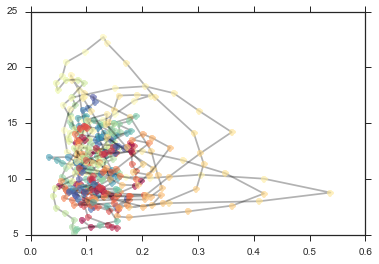

In [49]:
#perFlyVT = np.nan*np.ones((len(activeFragments),len(plotBegin)))
#perFlyVR = np.nan*np.ones((len(activeFragments),len(plotBegin)))
#perFlyTI = np.nan*np.ones((len(activeFragments),len(plotBegin)))

windowSize = 10*5
cNorm  = colors.Normalize(vmin=0, vmax=windowSize)
timeCMap = plt.cm.ScalarMappable(norm=cNorm,cmap='Spectral')
perFlyVT = np.nan*np.ones((windowSize,len(plotBegin)))
perFlyVR = np.nan*np.ones((windowSize,len(plotBegin)))
perFlyTI = np.nan*np.ones((windowSize,len(plotBegin)))

for fly in activeFragments:
    #try:
    for i in range(len(plotBegin)):
        perFlyVT[:,i] = transV_filt[plotBegin[i]:plotBegin[i]+windowSize,fly]
        perFlyVR[:,i] = abs(rotV_filt[plotBegin[i]:plotBegin[i]+windowSize,fly])
        perFlyTI[:,i] = rotV_filt[plotBegin[i]:plotBegin[i]+windowSize,fly]/transV_filt[plotBegin[i]:plotBegin[i]+windowSize,fly]

    plt.plot(np.nanmean(perFlyVR[:,:],1),np.nanmean(perFlyVT[:,:],1),
             color='k',linestyle='-',alpha=0.3)
    for timept in range(windowSize):
        plt.plot(np.nanmean(perFlyVR[timept,:],0),np.nanmean(perFlyVT[timept,:],0),
                 color=timeCMap.to_rgba(timept),linestyle='',marker='o',alpha=0.6)

    #except:
    #    print('problem with trace fragment of fly' + str(fly))